<a href="https://colab.research.google.com/github/biondo999/Cfd/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
    import firedrake
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/firedrake-install-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
    import firedrake

--2023-09-28 08:41:34--  https://fem-on-colab.github.io/releases/firedrake-install-real.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4581 (4.5K) [application/x-sh]
Saving to: ‘/tmp/firedrake-install.sh’

/tmp/firedrake-inst 100%[===================>]   4.47K  --.-KB/s    in 0s      

2023-09-28 08:41:34 (37.1 MB/s) - ‘/tmp/firedrake-install.sh’ saved [4581/4581]

+ INSTALL_PREFIX=/usr/local
++ awk -F/ '{print NF-1}'
++ echo /usr/local
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FIREDRAKE_INSTALLED=/usr/local/share/fem-on-colab/firedrake.installed
+ [[ ! -f /usr/local/share/fem-on-colab/firedrake.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/4e2d907/rele

In [2]:
from firedrake import *
import numpy as np
import matplotlib . pyplot as plt

In [14]:
nx=4
ny=4

mesh = RectangleMesh (nx , ny ,3,1,
diagonal ='left')



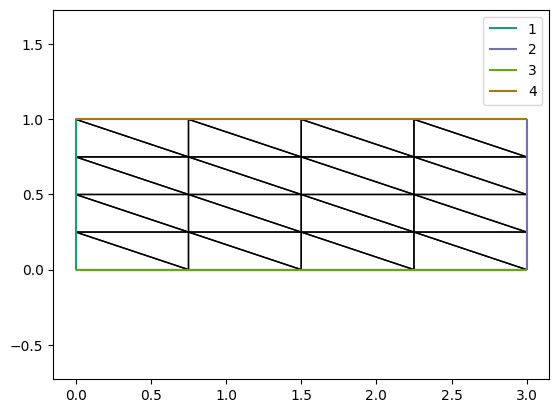

In [15]:
fig , ax = plt. subplots ()
triplot(mesh , axes =ax)
ax.axis('equal')
ax. legend ()
# n_elem=nx *ny *2
# n_x_points=nx + 1

In [26]:
V = VectorFunctionSpace (mesh,'P',2)
Q = FunctionSpace (mesh,'P',1)

print(V.dim(),Q.dim())

W = MixedFunctionSpace([V,Q])  #so can write the var form in one line



u,p=TrialFunctions(W)
v,q=TestFunctions(W)

162 25


In [27]:
g3= Constant((0.,0.))
g4= Constant((1.,0.))
bc3= DirichletBC(W.sub(0),g3,3)
bc4=DirichletBC(W.sub(0),g4,4)
bcs=(bc3,bc4)



In [31]:
#dot := sclar prod between vec ,inner for any dim
a=inner(grad(u),grad(v)) *dx -div(v)*p*dx +q *div(u)*dx
L=inner(Constant((0.0,0.0)),v) *dx


wh=Function(W)
solve(a==L,wh,bcs=bcs)
uh,ph=wh.subfunctions

Text(0.5, 1.0, 'pressure')

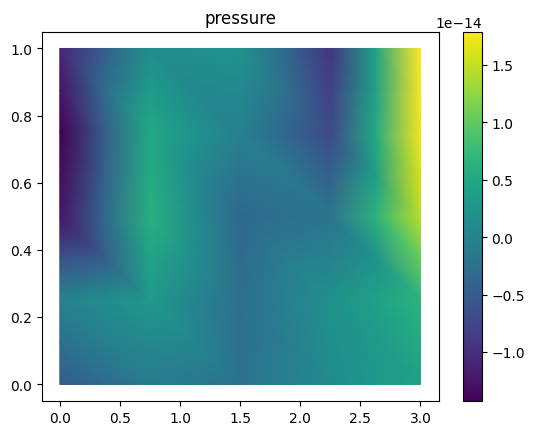

In [32]:
fig , ax = plt. subplots ()
col = tripcolor (ph, axes =ax)
plt.colorbar(col)
plt.title('pressure')

Text(0.5, 1.0, 'velocity')

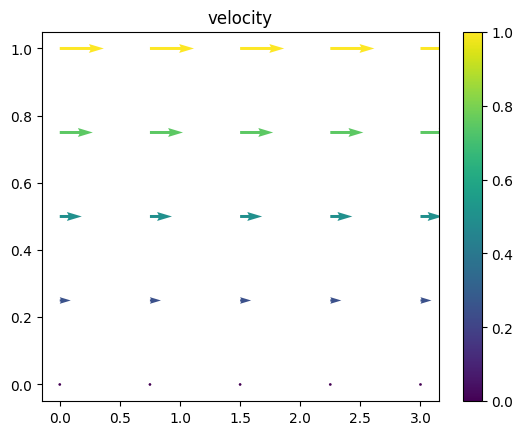

In [33]:
fig , ax = plt. subplots ()
col = quiver (uh, axes =ax)
plt.colorbar(col)
plt.title('velocity')

In [35]:
x=SpatialCoordinate(mesh)
u_ex=as_vector([x[1],0.])
grad_u_ex=as_tensor([[0.,1.],[0.,0.]])
p_ex=Constant(0.)
errL2=sqrt(assemble(inner(uh-u_ex,uh-u_ex)*dx))
print(errL2)



2.5879185528040944e-15
